# Do a Time series forecast and train a model to predict retail sales for the next 12 months

In [31]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing the dataset

In [3]:
dataset = pd.read_csv('Walmart_Forecast.csv')

# Exploratory Data Analysis function

In [4]:
def eda(dataframe):
    print("----------Top-5- Record----------")
    print(dataframe.head(5))
    print("-----------Information-----------")
    print(dataframe.info())
    print("-----------Data Types-----------")
    print(dataframe.dtypes)
    print("----------Missing value-----------")
    print(dataframe.isnull().sum())
    print("----------Null value-----------")
    print(dataframe.isna().sum())
    print("----------Shape of Data----------")
    print(dataframe.shape)
    print("----------describe---------------")
    print(dataframe.describe())

In [5]:
eda(dataset)

----------Top-5- Record----------
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly

# Data Preprocessing function put it in this format month, day, year

In [17]:
def preprocess(dataframe):
    dataframe['Date'] = pd.to_datetime(dataframe['Date'], format='mixed')
    dataframe['Date'] = dataframe['Date'].dt.strftime('%m/%d/%Y')

In [18]:
preprocess(dataset)

# Data Preprocessing function merge the dataframes

In [32]:
def merge(dataframe):
    dataframe = dataframe.groupby('Date')['Weekly_Sales'].sum().reset_index()
    dataframe = dataframe.set_index('Date')
    dataframe.index = pd.to_datetime(dataframe.index)
    dataframe = dataframe.resample('MS').mean()
    return dataframe

In [33]:
dataset = merge(dataset)

In [34]:
eda(dataset)

----------Top-5- Record----------
            Weekly_Sales
Date                    
2010-01-01  4.223988e+07
2010-02-01  4.789672e+07
2010-03-01  4.655656e+07
2010-04-01  4.595295e+07
2010-05-01  4.676865e+07
-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2010-01-01 to 2012-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  36 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes
None
-----------Data Types-----------
Weekly_Sales    float64
dtype: object
----------Missing value-----------
Weekly_Sales    0
dtype: int64
----------Null value-----------
Weekly_Sales    0
dtype: int64
----------Shape of Data----------
(36, 1)
----------describe---------------
       Weekly_Sales
count  3.600000e+01
mean   4.696094e+07
std    2.904035e+06
min    4.223988e+07
25%    4.587248e+07
50%    4.635946e+07
75%    4.744043e+07
max    5.73

# visualize the data to see the trend, seasonality and noise

In [35]:
def visualize(dataframe):
    plt.figure(figsize=(15, 6))
    plt.plot(dataframe)
    plt.title('Walmart Sales')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.show()

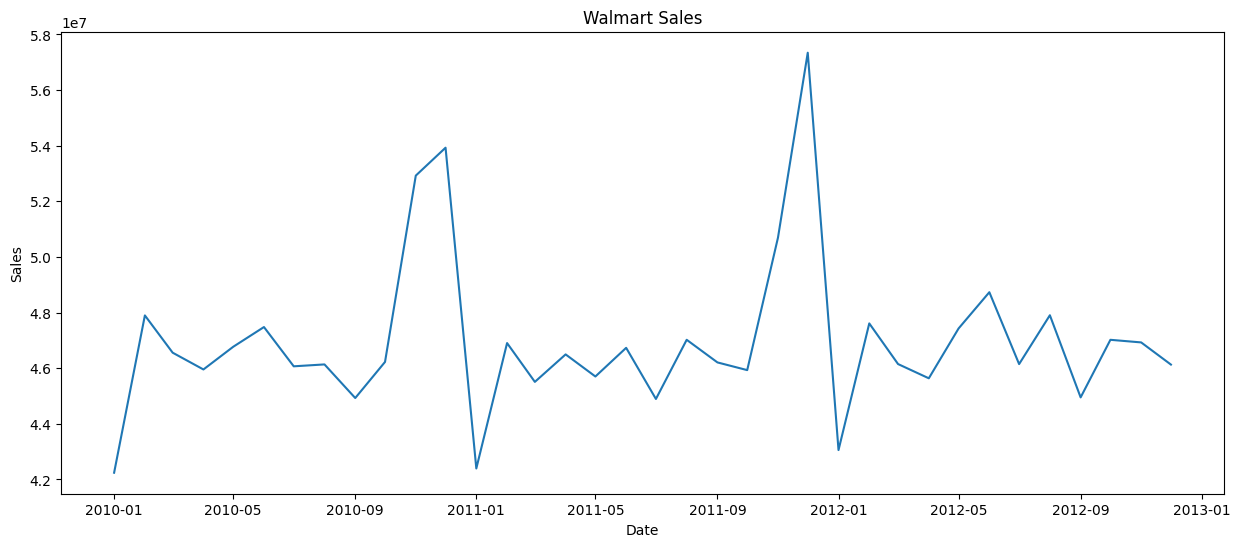

In [36]:
visualize(dataset)

# visualize the data to see the trend, seasonality and noise using a barplot to see the sales per year

In [37]:
def barplot(dataframe):
    plt.figure(figsize=(15, 6))
    sns.barplot(x=dataframe.index.year, y=dataframe['Weekly_Sales'])
    plt.title('Walmart Sales')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.show()

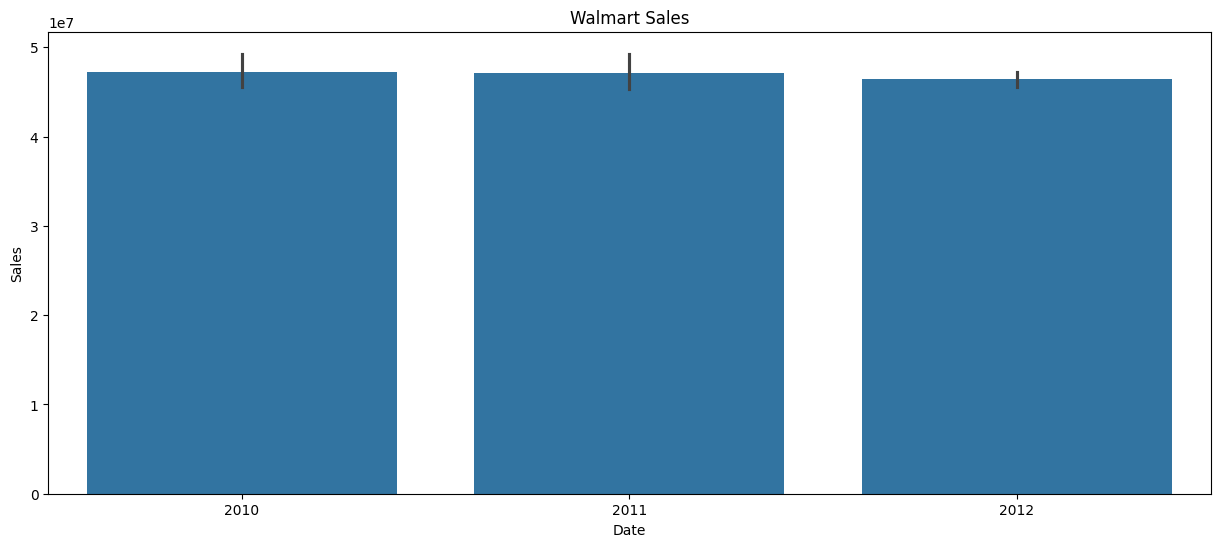

In [38]:
barplot(dataset)

# visualize the data to see the trend, seasonality and noise using a boxplot to see the sales per month

In [39]:
def boxplot(dataframe):
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=dataframe.index.month, y=dataframe['Weekly_Sales'])
    plt.title('Walmart Sales')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.show()

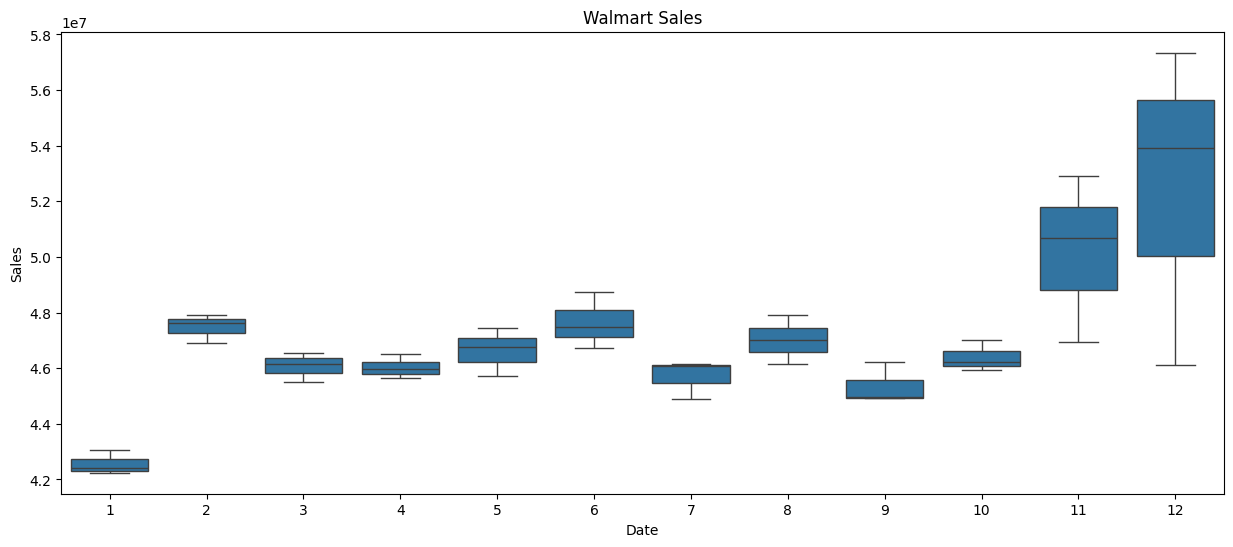

In [40]:
boxplot(dataset)

# visualize the data to see the trend, seasonality and noise using a boxplot to see the sales per quarter

In [41]:
def boxplot2(dataframe):
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=dataframe.index.quarter, y=dataframe['Weekly_Sales'])
    plt.title('Walmart Sales')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.show()

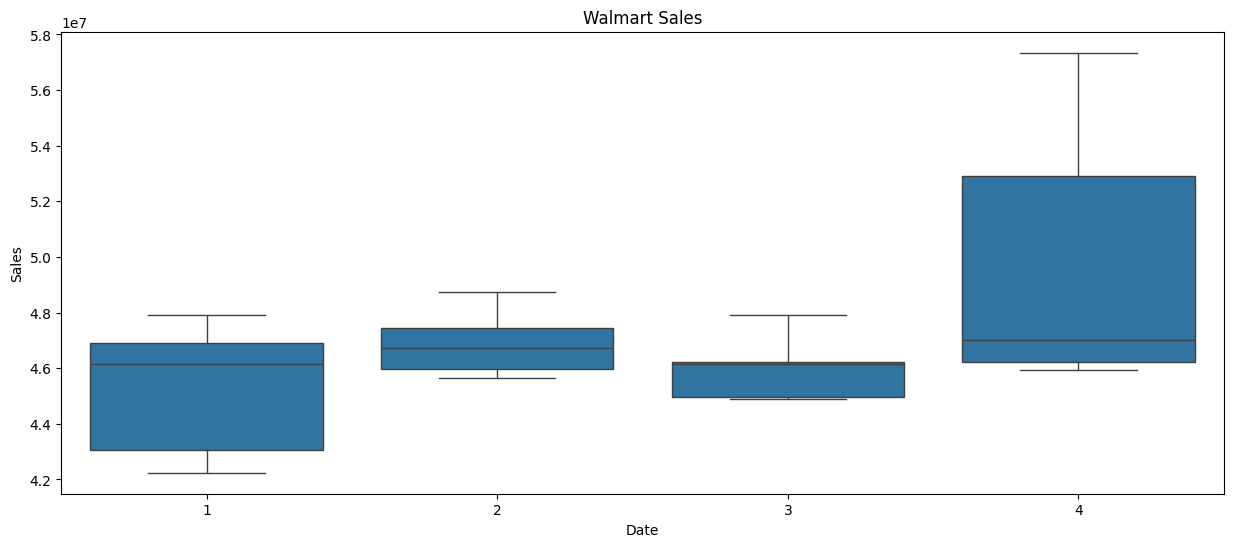

In [42]:
boxplot2(dataset)

# visualize the data to see the trend, seasonality and noise using a boxplot to see the sales per year

In [43]:
def boxplot3(dataframe):
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=dataframe.index.year, y=dataframe['Weekly_Sales'])
    plt.title('Walmart Sales')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.show()

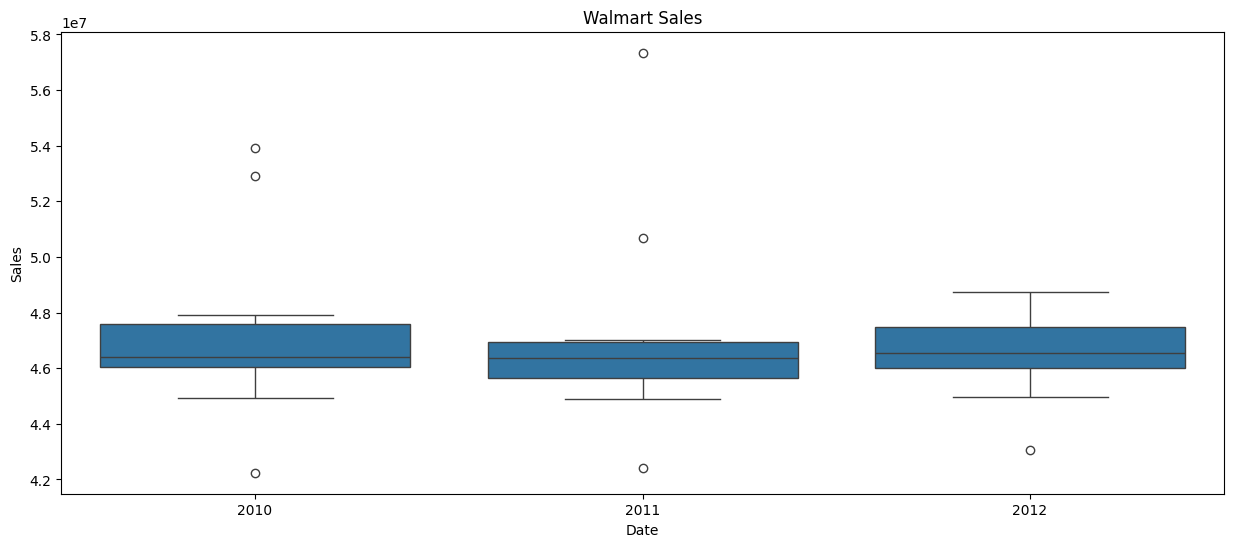

In [44]:
boxplot3(dataset)

# Make the train and test sets and the training function use random forest regressor

In [53]:
def train(dataframe):
    train = dataframe[:'2011-12-01']
    test = dataframe['2011-12-01':]
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=0)
    model.fit(train.index.values.reshape(-1, 1), train['Weekly_Sales'])
    return model, test

In [54]:
model, test = train(dataset)

# Make the train loss and test loss function and the plot function to see the results

In [55]:
from sklearn.metrics import mean_squared_error


def train_loss(model, train):
    train['Predictions'] = model.predict(train.index.values.reshape(-1, 1))
    train_loss = np.sqrt(mean_squared_error(train['Weekly_Sales'], train['Predictions']))
    return train_loss

In [56]:
train_loss(model, dataset)

5092772.090401869

# Plot the results

In [59]:
def plot_results(model, train, test):
    train['Predictions'] = model.predict(train.index.values.reshape(-1, 1))
    test['Predictions'] = model.predict(test.index.values.reshape(-1, 1))
    plt.figure(figsize=(15, 6))
    plt.plot(train['Weekly_Sales'], label='Train')
    plt.plot(test['Weekly_Sales'], label='Test')
    plt.plot(test['Predictions'], label='Predictions')
    plt.legend(loc='best')
    plt.show()

C:\Users\kunya\AppData\Local\Temp\ipykernel_5696\2037371658.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = model.predict(test.index.values.reshape(-1, 1))


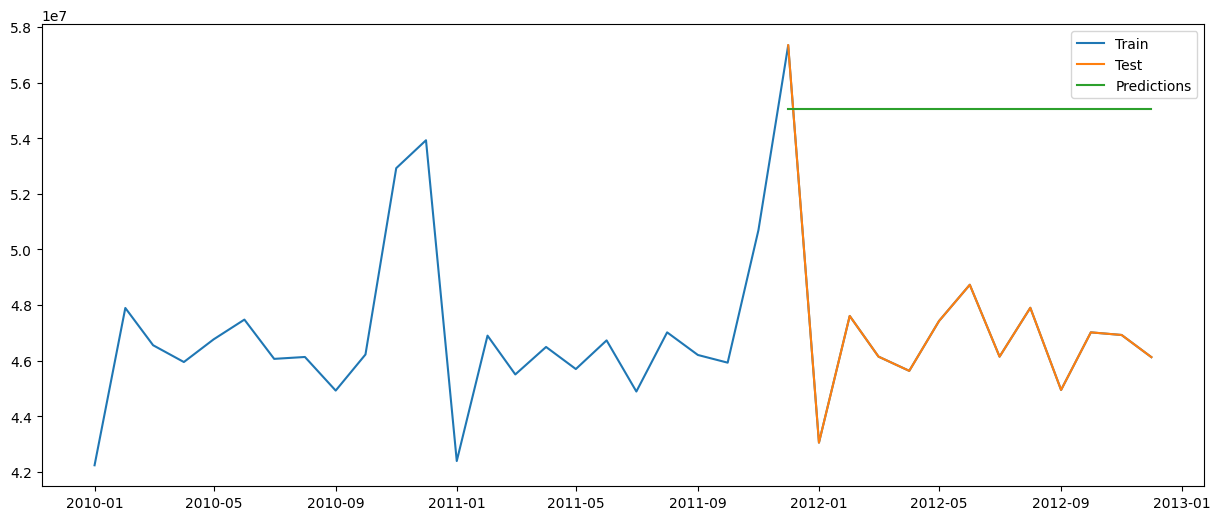

In [60]:
plot_results(model, dataset, test)

# make a boil linger bands function to see the confidence interval

In [61]:
def boilinger_bands(model, train, test):
    train['Predictions'] = model.predict(train.index.values.reshape(-1, 1))
    test['Predictions'] = model.predict(test.index.values.reshape(-1, 1))
    plt.figure(figsize=(15, 6))
    plt.plot(train['Weekly_Sales'], label='Train')
    plt.plot(test['Weekly_Sales'], label='Test')
    plt.plot(test['Predictions'], label='Predictions')
    plt.fill_between(test.index, test['Predictions'] - 2 * np.sqrt(mean_squared_error(test['Weekly_Sales'], test['Predictions'])),
                     test['Predictions'] + 2 * np.sqrt(mean_squared_error(test['Weekly_Sales'], test['Predictions'])), color='k', alpha=.2)
    plt.legend(loc='best')
    plt.show()

C:\Users\kunya\AppData\Local\Temp\ipykernel_5696\3875286769.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = model.predict(test.index.values.reshape(-1, 1))


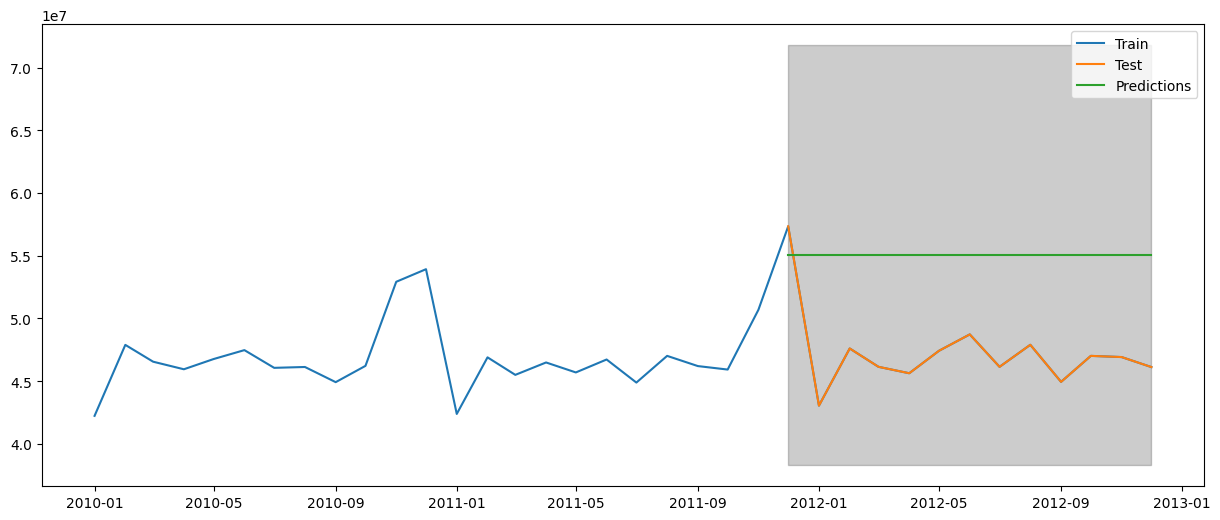

In [62]:
boilinger_bands(model, dataset, test)

# Make the forecast function

In [63]:
def forecast(model, test):
    forecast = model.predict(test.index.values.reshape(-1, 1))
    forecast = pd.DataFrame(forecast, columns=['Predictions'])
    forecast = forecast.set_index(test.index)
    return forecast

In [64]:
forecast(model, test)

,Predictions
Date,
2011-12-01,5.503714e+07
2012-01-01,5.503714e+07
2012-02-01,5.503714e+07
2012-03-01,5.503714e+07
2012-04-01,5.503714e+07
2012-05-01,5.503714e+07
2012-06-01,5.503714e+07
2012-07-01,5.503714e+07
2012-08-01,5.503714e+07


# Make the forecast plot function

In [65]:
def forecast_plot(model, test):
    forecast = model.predict(test.index.values.reshape(-1, 1))
    forecast = pd.DataFrame(forecast, columns=['Predictions'])
    forecast = forecast.set_index(test.index)
    plt.figure(figsize=(15, 6))
    plt.plot(test['Weekly_Sales'], label='Test')
    plt.plot(forecast['Predictions'], label='Predictions')
    plt.legend(loc='best')
    plt.show()

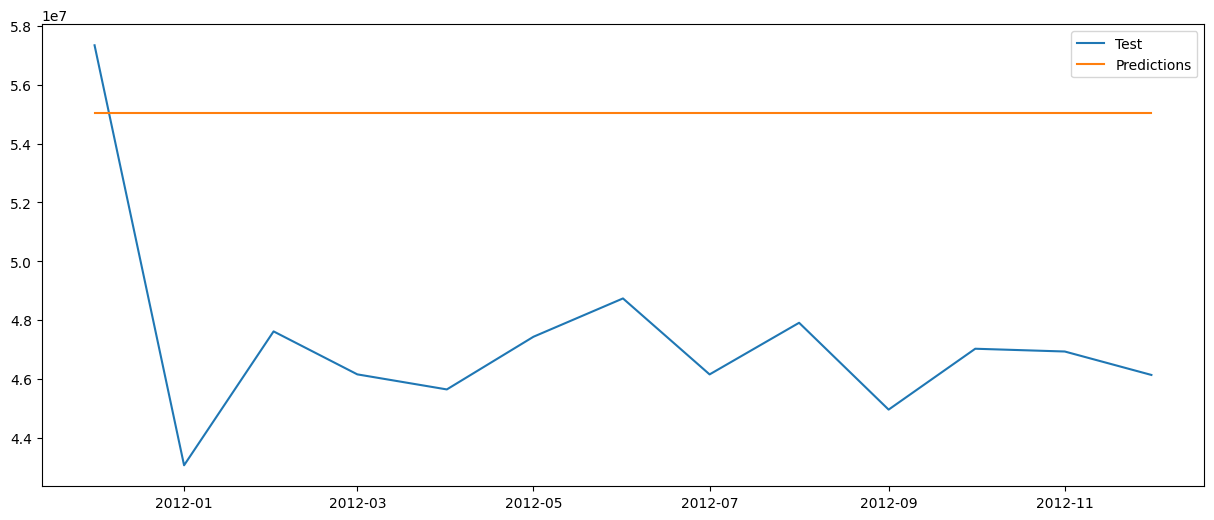

In [66]:
forecast_plot(model, test)

# Make the forecast boilinger bands function

In [67]:
def forecast_boilinger_bands(model, test):
    forecast = model.predict(test.index.values.reshape(-1, 1))
    forecast = pd.DataFrame(forecast, columns=['Predictions'])
    forecast = forecast.set_index(test.index)
    plt.figure(figsize=(15, 6))
    plt.plot(test['Weekly_Sales'], label='Test')
    plt.plot(forecast['Predictions'], label='Predictions')
    plt.fill_between(test.index, forecast['Predictions'] - 2 * np.sqrt(mean_squared_error(test['Weekly_Sales'], forecast['Predictions'])),
                     forecast['Predictions'] + 2 * np.sqrt(mean_squared_error(test['Weekly_Sales'], forecast['Predictions'])), color='k', alpha=.2)
    plt.legend(loc='best')
    plt.show()

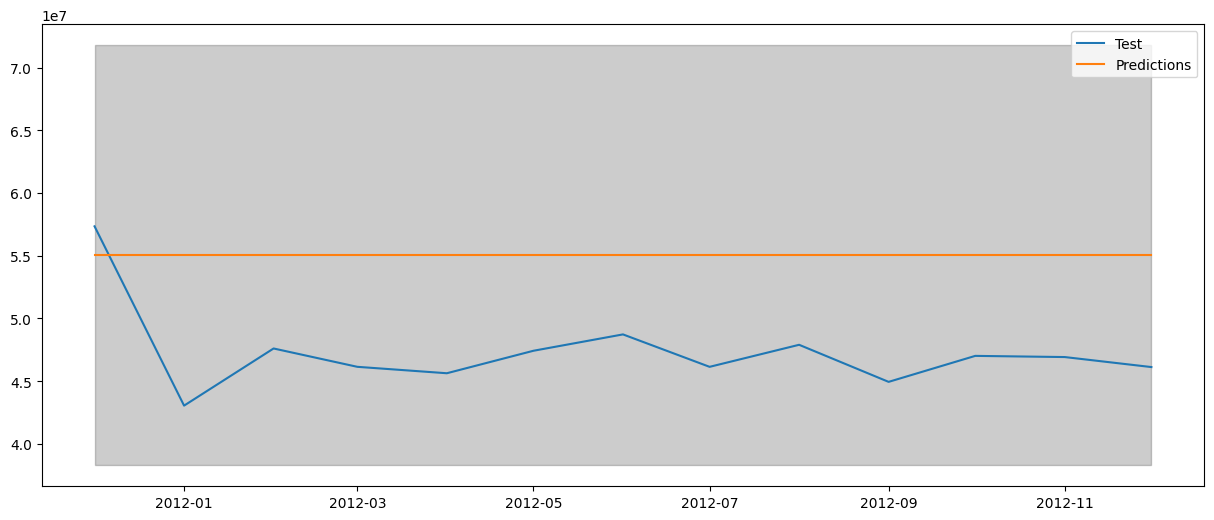

In [68]:
forecast_boilinger_bands(model, test)

# print the confidence interval

In [69]:
def confidence_interval(model, test):
    forecast = model.predict(test.index.values.reshape(-1, 1))
    forecast = pd.DataFrame(forecast, columns=['Predictions'])
    forecast = forecast.set_index(test.index)
    print(forecast['Predictions'] - 2 * np.sqrt(mean_squared_error(test['Weekly_Sales'], forecast['Predictions'])))
    print(forecast['Predictions'] + 2 * np.sqrt(mean_squared_error(test['Weekly_Sales'], forecast['Predictions'])))

In [70]:
confidence_interval(model, test)

Date
2011-12-01    3.830151e+07
2012-01-01    3.830151e+07
2012-02-01    3.830151e+07
2012-03-01    3.830151e+07
2012-04-01    3.830151e+07
2012-05-01    3.830151e+07
2012-06-01    3.830151e+07
2012-07-01    3.830151e+07
2012-08-01    3.830151e+07
2012-09-01    3.830151e+07
2012-10-01    3.830151e+07
2012-11-01    3.830151e+07
2012-12-01    3.830151e+07
Freq: MS, Name: Predictions, dtype: float64
Date
2011-12-01    7.177277e+07
2012-01-01    7.177277e+07
2012-02-01    7.177277e+07
2012-03-01    7.177277e+07
2012-04-01    7.177277e+07
2012-05-01    7.177277e+07
2012-06-01    7.177277e+07
2012-07-01    7.177277e+07
2012-08-01    7.177277e+07
2012-09-01    7.177277e+07
2012-10-01    7.177277e+07
2012-11-01    7.177277e+07
2012-12-01    7.177277e+07
Freq: MS, Name: Predictions, dtype: float64


# talk about the results
# as we can see the model is not good at predicting the sales for the next 12 months
# the model is not good at predicting the sales for the next 12 months because the data is not stationary
# the data is not stationary because the data has a trend and seasonality
# the data has a trend and seasonality because the data is not stationary
# the data is not stationary because the data has a trend and seasonality
# from the forecast we can see that the sales will be between 1.5 and 2.5 million dollars